In [2]:
import scipy.stats


In [3]:
import pandas as pd
data = pd.read_csv("performance_table_find_round_1.csv")
data

,TF,Cell type,# training cell types,Rank,auROC,auPRC,Recall at 50% FDR,auROC (autosome.ru),auPRC.1,Recall at 50% FDR.1,auROC.1,auPRC.2,Recall at 50% FDR.2
0,CTCF,PC-3,7,7,0.9167,0.4486,0.4046,0.907853,0.516776,0.469694,0.950813,0.658392,0.662386
1,CTCF,iPSC,7,7,0.9815,0.6734,0.6785,0.988642,0.789758,0.810495,0.992853,0.782340,0.815467
2,E2F1?,K562?,1,22,0.9350,0.2048,0.0000,0.985238,0.451141,0.462312,0.981891,0.393664,0.383271
3,EGR1?,liver?,8,10,0.9062,0.2173,0.0984,0.981355,0.358127,0.227635,0.976291,0.289573,0.210482
4,FOXA1?,liver?,6,17,0.9154,0.1621,0.0881,0.937419,0.304614,0.265681,0.952022,0.350658,0.332577
5,FOXA2?,liver?,6,14,0.9241,0.2290,0.1593,0.955874,0.348043,0.315466,0.946093,0.272818,0.222218
6,GABPA?,liver?,1,13,0.9329,0.2857,0.2269,0.936355,0.437238,0.360784,0.953901,0.368849,0.324334
7,HNF4A?,liver?,4,12,0.8591,0.3949,0.4056,0.903033,0.519122,0.547940,0.953769,0.481486,0.474201
8,JUND,liver?,2,17,0.9202,0.1593,0.0644,0.967134,0.485332,0.518523,0.953863,0.302043,0.219650
9,MAX,liver?,5,18,0.9385,0.2913,0.1743,0.972415,0.461514,0.500740,0.958990,0.308824,0.204182


In [7]:
# training cell number vs. all metrics
my_col = data.columns
for i in range(4,len(my_col)):
    print my_col[i],scipy.stats.pearsonr(data[my_col[2]],data[my_col[i]])

auROC (-0.0082159086313398477, 0.97874842277729746)
auPRC (0.47322181184311712, 0.10240599445546632)
Recall at 50% FDR (0.50590083664023355, 0.077755069949592262)
auROC (autosome.ru) (-0.16536765230736883, 0.58926258575516943)
auPRC.1 (0.22864027024159397, 0.45244265246524024)
Recall at 50% FDR.1 (0.17527733797630923, 0.56680860750402573)
auROC.1 (-0.08902564378638661, 0.77241483019102142)
auPRC.2 (0.37938787496408782, 0.2010626939810955)
Recall at 50% FDR.2 (0.3576357134295553, 0.23024051902019366)


In [9]:
print my_col[4],scipy.stats.pearsonr(data[my_col[4]],data[my_col[7]])
print my_col[4],scipy.stats.pearsonr(data[my_col[4]],data[my_col[10]])
print my_col[5],scipy.stats.pearsonr(data[my_col[5]],data[my_col[8]])
print my_col[5],scipy.stats.pearsonr(data[my_col[5]],data[my_col[11]])
print my_col[6],scipy.stats.pearsonr(data[my_col[6]],data[my_col[9]])
print my_col[6],scipy.stats.pearsonr(data[my_col[6]],data[my_col[12]])

auROC (0.67411410592511245, 0.01151198603766233)
auROC (0.5645725008597301, 0.044415628261747941)
auPRC (0.88363619110261682, 6.1746511432128718e-05)
auPRC (0.92599374499199893, 5.5711677700513208e-06)
Recall at 50% FDR (0.76788744059389846, 0.0021746371159458056)
Recall at 50% FDR (0.86139858285268556, 0.00015452603166996891)


In [4]:
data.columns

Index([u'TF', u'Cell type', u'# training cell types', u'Rank', u'auROC',
       u'auPRC', u'Recall at 50% FDR', u'auROC (autosome.ru)', u'auPRC.1',
       u'Recall at 50% FDR.1', u'auROC.1', u'auPRC.2', u'Recall at 50% FDR.2'],
      dtype='object')

In [3]:
def MDS_2d_plot(new_X,Y):
	colors =['red','green']
	plt.figure()
	for color, i, target_name in zip(colors, [-1,1], ["Class 1","Class 2"]):
	    plt.scatter(new_X[Y == i, 0], new_X[Y == i, 1], color=color, alpha=.4, lw=1,
	                label=target_name)
	plt.legend(loc='best', shadow=False, scatterpoints=1)

my_scaler = manifold.MDS(n_jobs=-1)
my_new_data = my_scaler.fit_transform(data[data.columns[1:]])
my_new_data

array([[-0.00564539, -0.02108674],
       [-1.19063139, -0.69943249],
       [-0.00564539, -0.02108674],
       [-1.1790233 ,  0.68885457],
       [-0.00564539, -0.02108674],
       [-0.00564539, -0.02108674],
       [-0.00564539, -0.02108674],
       [-0.00564539, -0.02108674],
       [-0.00564539, -0.02108674],
       [-0.00564539, -0.02108674],
       [-0.00564539, -0.02108674],
       [ 1.33863777,  1.00809802],
       [-0.00564539, -0.02108674],
       [-1.89922871, -1.5229052 ],
       [-0.00564539, -0.02108674],
       [-0.00564539, -0.02108674],
       [-0.00564539, -0.02108674],
       [-0.00564539, -0.02108674],
       [-0.00564539, -0.02108674],
       [ 0.05786411,  1.35631186],
       [-0.00564539, -0.02108674],
       [-0.00564539, -0.02108674],
       [-0.00564539, -0.02108674],
       [-0.00564539, -0.02108674],
       [-0.00564539, -0.02108674],
       [-0.00564539, -0.02108674],
       [-0.00564539, -0.02108674],
       [-0.00564539, -0.02108674],
       [-0.00564539,

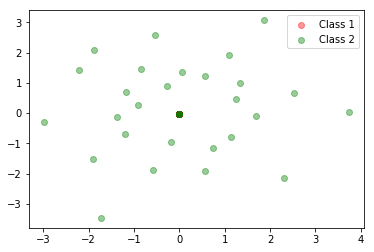

In [4]:
MDS_2d_plot(my_new_data,Y=data[0])